# Independent Reasearch - Teenage Fertility Rate and Secondary School Enrollment


Video: https://www.youtube.com/watch?v=etjSSc4bkN4

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ x ] NO - keep private

# Overview

This report provides evidence on the effect of secondary school enrollment on the teenage fertility rate and we estimate the effect with a linear-log multiple regression model with entity-fixed effect. By comparing countries in the cultural cluster in 2013, we find that while holding real GDP, secondary education start age, approximately a 2.5% increase in gross secondary education enrollment rate is associated with 1 fewer teenage mother per 1000 female age between twelve and eighteen.

<a id='research_question'></a>
# Research Question

*__Is increasing the coverage of secondary education the right solution to adolescent fertility?__*
<br>
<br>
We try to answer this question by narrowing down this larger question to investigate the correlation between the gross secondary education enrollment rate of a nation and its teenage fertility rate. We are specifically interested in 
<br>
(1) finding the estimated effect of secondary education enrollment rate on teenage fertility rate, and the statistical significance of the correlation with inferential analysis
<br>
(2) the predictive power of secondary education enrollment rate on teenage fertility rate with predictive analysis

<a id='background'></a>

## Background & Prior Work

The teenage fertility rate has gained attention from sociologists even since before it is systematically recorded, as it is one of the most important indices to quantify the curial subset of national welfare - the welfare of adolescent citizens. We generally perceive the teenage fertility rate to be positively correlated with the national welfare.

There have been previous researchers whose work shows that the completion status (Azevedo et al., 2012) and length (Viner et al. 2017) of secondary school education is inversely correlated with teenage fertility rate. However, the established literatures, besides the two cited here, are often constrained to specific regions. Our mission here is to investigate globally if there is a correlation between secondary education enrollment rate and teenage fertility.

References (include links):
- 1) Azevedo JP, Favara M, Haddock SE, Lopez-Calva LF, Muller M, Perova E. Teenage Pregnancy and Opportunities in Latin America and the Caribbean : On Teenage Fertility Decisions, Poverty and Economic Achievement. Worldbankorg. Published online 2012. https://openknowledge.worldbank.org/handle/10986/16978
‌
- 2) Viner RM, Hargreaves DS, Ward J, Bonell C, Mokdad AH, Patton G. The health benefits of secondary education in adolescents and young adults: An international analysis in 186 low-, middle- and high-income countries from 1990 to 2013. SSM - Population Health. 2017;3:162-171. https://www.sciencedirect.com/science/article/pii/S2352827316301690
‌

# Hypothesis


Our hypothesis is that secondary education enrollment rate is a significant predictor of teenage fertility rate: there exists a statistically significant negative correlation between the two variables given all else being held constant. Equivalently, we state our hypothesis as the following: 

<br/>
- Null hypothesis: there is no correlation between secondary education enrollment rate and teenage fertility rate
<br/>
- Alternative hypothesis: there is a (negative) correlation between secondary education enrollment rate and teenage fertility rate
<br>
<br>
We hold such hypothesis based on our assumption that higher coverage of secondary school enrollment increases teenagers awarness of why adolescent fertility is biologically a less optimal choice. Also, we assume that educated teenagers are better invested human capitals, who bears higher opportunity cost of pregnancy.

# Dataset(s)


- Dataset Name: World Development Indicators from the World Bank
- Link to the dataset: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators
- Number of observations: 264 observations of 20 variables after wrangling

The full dataset contains country-level development indicators for 266 countries/regions around the world. There are in total 1400+ development indicators measuring economics, education, health, and demographics. Examples are real GDP per capita, education enrollment rate, fertility rate by group, and average personal income. The full data set has observations for each country from 1981 to 2016. We will only use a subset of the years and indicators.

- Dataset Name: Series Code of WDI from the World Bank
- Link to the dataset: https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators
- Number of observations: 1450

This is a supplementary dataset containing the specific information including variable code, variable name, description, unit of measurements, etc. It specifies the indicator which appears only as name and code in the main dataset. We use this to extract variables related to secondary school education status since there are too many to examine manually. Units will be added to the dataset by a left merge to the main dataset.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import patsy
import statsmodels.api as sm

In [2]:
from IPython.display import Image

# Data Cleaning

<b> (1) loading and inspection </b>

In [3]:
df_full = pd.read_csv('WDI_full.csv')
var_code = pd.read_csv('var_code.csv')

In [4]:
len(pd.unique(var_code['Series Code']))

1452

In [5]:
df_full.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,75.463958,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,84.362348,NaN,86.280351,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,58.696062,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,71.984231,NaN,73.917807,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,91.847193,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,93.839661,NaN,95.156730,NaN,NaN,NaN,NaN


In [6]:
df_full.shape

(383328, 31)

We observe that the original dataset is very large, the dimension being: 383328 rows $\times$ 31 columns. We would only need a subset of it, so the part we are interested in needed querying.

The dataset is not in the clear form that each observation is a row with each feature being a column: in particular, we see that each year is a column here while indicators are row entries under the 'Indicator Name' column; therefore after subsetting, we need to convert the provided wide dataset to a long dataset where each variable takes one column.

Missing entry here is recorded as NaN, we will check the data type of the missing value presented and deal with it later.

In [7]:
df_full.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [8]:
full_checked_cols = ['Country Name', 'Country Code', 
                     'Indicator Name', 'Indicator Code', 
                     '2010', '2011', '2012', '2013', '2014', '2015', '2016']

We will only observe the recent years since our goal is to infer the possible effect of secondary school enrollment on teenage fertility rates for recent years. Years starting from 2010 are selected, up till last year available.

In [9]:
df_full_checked_cols = df_full[full_checked_cols]

<b> (2) Cross section selection </b>
<br/>We will use fixed effect regression to make the prediction model; therefore cross-sectional data will be used. We have 7 candidate years from the previous part, suitable one(s) is to be selected here.

In [10]:
teen_fert = df_full_checked_cols[df_full_checked_cols["Indicator Code"] == "SP.ADO.TFRT"]
teen_fert.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016
48,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,49.672975,49.536047,49.383745,48.796558,48.196418,47.550194,NaN
1500,Caribbean small states,CSS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,61.286779,60.463396,59.559314,58.363478,57.109166,55.799601,NaN
2952,Central Europe and the Baltics,CEB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,21.088440,20.811315,20.629395,20.062750,19.519840,18.946255,NaN
4404,Early-demographic dividend,EAR,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,47.645806,46.139192,44.608416,43.132990,41.637707,40.127504,NaN
5856,East Asia & Pacific,EAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,19.294694,19.823676,20.366677,20.862558,21.314045,21.694045,NaN


In [11]:
for year in range(2010, 2017):
    na_rate = teen_fert[str(year)].isna().mean()
    print(str(year)+" data has na rate in fertility record of: {na_rate}".format(na_rate = na_rate))

2010 data has na rate in fertility record of: 0.09090909090909091
2011 data has na rate in fertility record of: 0.09090909090909091
2012 data has na rate in fertility record of: 0.09090909090909091
2013 data has na rate in fertility record of: 0.09090909090909091
2014 data has na rate in fertility record of: 0.09090909090909091
2015 data has na rate in fertility record of: 0.09090909090909091
2016 data has na rate in fertility record of: 1.0


In [12]:
gdp_perk = df_full_checked_cols[df_full_checked_cols["Indicator Code"] == "NY.GDP.PCAP.CD"]
gdp_perk
for year in range(2010, 2017):
    na_rate = gdp_perk[str(year)].isna().mean()
    print(str(year)+" data has na rate in GDP record of: {na_rate}".format(na_rate = na_rate))

2010 data has na rate in GDP record of: 0.07196969696969698
2011 data has na rate in GDP record of: 0.07196969696969698
2012 data has na rate in GDP record of: 0.08712121212121213
2013 data has na rate in GDP record of: 0.08333333333333333
2014 data has na rate in GDP record of: 0.10606060606060606
2015 data has na rate in GDP record of: 0.13636363636363635
2016 data has na rate in GDP record of: 1.0


We inspect the missingness in the two most important variables: the key control variable - teenage fertility rate, and the outcome variable - teenage fertility rate. We therefore select the most recent year with the least combined missingness: 2013

In [13]:
df_2013 = df_full_checked_cols[['Country Name', 'Country Code', 
                     'Indicator Name', 'Indicator Code', '2013']]

In [14]:
df_2013.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2013
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN
2,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN
3,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN
4,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN


In [15]:
len(pd.unique(df_2013['Indicator Name']))

1452

<b> (3) Appending Unit </b>

In [16]:
unit_code = var_code[['Series Code', 'Unit of measure']]

In [17]:
unit_code.columns = ['Indicator Code', 'Unit']

In [18]:
pd.unique(unit_code['Unit'])

array([nan, '%', '2011 PPP $'], dtype=object)

There are 3 unique units, two of which are not void. We will merge it to our main dataset so that units are included.

In [19]:
df_2013_unit = df_2013.merge(unit_code, left_on = 'Indicator Code', right_on = 'Indicator Code')
df_2013_unit

,Country Name,Country Code,Indicator Name,Indicator Code,2013,Unit
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN
1,Caribbean small states,CSS,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN
2,Central Europe and the Baltics,CEB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN
3,Early-demographic dividend,EAR,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN
4,East Asia & Pacific,EAS,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN
...,...,...,...,...,...,...
383323,Virgin Islands (U.S.),VIR,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN
383324,West Bank and Gaza,WBG,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,99.348427,NaN
383325,"Yemen, Rep.",YEM,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN
383326,Zambia,ZMB,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN


After the first few steps of wrangling, we have the desired time span of 2013 and unit included as a column. The remaining tasks would be to reshape the dataset so that each variable takes a column while each observation is a row. When done with wrangling, we should have a dataset whose number of rows equals the number of countries.

<b> (4) Variable screening selection </b>

In [20]:
teen_fert_code = "SP.ADO.TFRT"
gdp_pk_code = "NY.GDP.PCAP.CD"
trained_sec_tch = "SE.SEC.TCAQ.FE.ZS"
#manually adding trained secondary teacher percentage

*We checked the supplmentary dataset for variable names and manually added those variables*

In [21]:
def check_secondary(str_in):
    str_in = str_in.lower()
    return ("secondary" in str_in and "school" in str_in)

*we now check and seek for all possible relavent variables with the condition that the indicator name contains two key words: "school" and "secondary", though consecutive occurance is now enforced.*

In [22]:
sec_educ_var = var_code[var_code["Indicator Name"].apply(check_secondary)][["Series Code", "Indicator Name"]]

In [23]:
sec_educ_var_code = sec_educ_var["Series Code"].tolist()

In [24]:
sec_educ_var_code.append(teen_fert_code)
sec_educ_var_code.append(gdp_pk_code)
sec_educ_var_code.append(trained_sec_tch)

var_ref = var_code[['Series Code', 'Indicator Name']]
var_ref = var_ref[var_ref['Series Code'].isin(sec_educ_var_code)]
var_ref

,Series Code,Indicator Name
805,NY.GDP.PCAP.CD,GDP per capita (current US$)
876,SE.ENR.PRSC.FM.ZS,"School enrollment, primary and secondary (gros..."
877,SE.ENR.SECO.FM.ZS,"School enrollment, secondary (gross), gender p..."
937,SE.SEC.AGES,Lower secondary school starting age (years)
960,SE.SEC.ENRR,"School enrollment, secondary (% gross)"
961,SE.SEC.ENRR.FE,"School enrollment, secondary, female (% gross)"
962,SE.SEC.ENRR.MA,"School enrollment, secondary, male (% gross)"
963,SE.SEC.NENR,"School enrollment, secondary (% net)"
964,SE.SEC.NENR.FE,"School enrollment, secondary, female (% net)"
965,SE.SEC.NENR.MA,"School enrollment, secondary, male (% net)"


*from the sup-dataset we have selected the following variables, their codes and names are presented above.*

In [25]:
var_ref = var_ref.drop([876, 962, 877, 966, 967, 968, 982, 983, 984,963,964,965])
sec_educ_var_code = var_ref['Series Code'].tolist()
#dropping before screening

*we pre-select the datasets with respect to the assumptions of regression, mainly variables deleted here are due to multi-colinearity and irrelevance information.*
<br/>
<br/>
*Specifically, for variables in pairs of male and female measurement, there are almost perfectly linearly related by male% + female% = 1; therefore, only female-related indices are kept.*
<br/>
<br/>*irrelevant variables that happen to satisfy our screening condition are also deleted.*

In [26]:
df_2013_unit = df_2013_unit[df_2013_unit["Indicator Code"].isin(sec_educ_var_code)]
df_2013_unit.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2013,Unit
12672,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,48.796558,NaN
12673,Caribbean small states,CSS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,58.363478,NaN
12674,Central Europe and the Baltics,CEB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,20.062750,NaN
12675,Early-demographic dividend,EAR,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,43.132990,NaN
12676,East Asia & Pacific,EAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,20.862558,NaN


*only selected and relevant variables are left in df_2013_unit, the task left is to shape-transform the data*

<b> (5) Reshaping dataset: from Wide to Long </b>

In [27]:
teenM = df_2013_unit[df_2013_unit["Indicator Code"] == teen_fert_code]
teenM

,Country Name,Country Code,Indicator Name,Indicator Code,2013,Unit
12672,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,48.796558,NaN
12673,Caribbean small states,CSS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,58.363478,NaN
12674,Central Europe and the Baltics,CEB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,20.062750,NaN
12675,Early-demographic dividend,EAR,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,43.132990,NaN
12676,East Asia & Pacific,EAS,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,20.862558,NaN
...,...,...,...,...,...,...
12931,Virgin Islands (U.S.),VIR,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,45.736600,NaN
12932,West Bank and Gaza,WBG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,60.181600,NaN
12933,"Yemen, Rep.",YEM,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,63.731800,NaN
12934,Zambia,ZMB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,98.173800,NaN


In [28]:
teenMelted = pd.melt(teenM, id_vars=['Country Name', 'Country Code'], 
                     value_vars = ["2013"], value_name = "fetility rate")
teenMelted = teenMelted.drop(columns = "variable")
teenMelted

,Country Name,Country Code,fetility rate
0,Arab World,ARB,48.796558
1,Caribbean small states,CSS,58.363478
2,Central Europe and the Baltics,CEB,20.062750
3,Early-demographic dividend,EAR,43.132990
4,East Asia & Pacific,EAS,20.862558
...,...,...,...
259,Virgin Islands (U.S.),VIR,45.736600
260,West Bank and Gaza,WBG,60.181600
261,"Yemen, Rep.",YEM,63.731800
262,Zambia,ZMB,98.173800


*The above section demonstrates how we deal with a single-var-case (example here be extracting teenage mother percentage from the dataset) of shape transformation, the technique used here is to melt the dataset with respect to country name and country code (as they are in pairs unique to each observation). After melting, the extra column created would be the 'variable' column which holds the actual measurement in pre-transformed data format, so it is dropped.*

In [29]:
df_2013_melted = teenMelted

In [30]:
for var in pd.unique(df_2013_unit["Indicator Code"]).tolist():
    sub_curr_var = df_2013_unit[df_2013_unit["Indicator Code"] == var]
    var_melted = pd.melt(sub_curr_var, id_vars=['Country Name', 'Country Code'], 
                     value_vars = ["2013"], value_name = var)
    var_melted = var_melted.drop(columns = "variable")
    df_2013_melted = df_2013_melted.merge(var_melted, 
                                          left_on = ["Country Code", "Country Name"], 
                                          right_on = ["Country Code", "Country Name"])

*iterate through each variable and merge the dataset gradually to form the final dataset*

In [31]:
df_2013_melted

,Country Name,Country Code,fetility rate,SP.ADO.TFRT,SE.SEC.PROG.ZS,NY.GDP.PCAP.CD,SE.SEC.ENRR,SE.SEC.AGES,SE.SEC.TCAQ.FE.ZS,SE.SEC.ENRR.FE
0,Arab World,ARB,48.796558,48.796558,86.762436,7518.692984,70.274689,NaN,83.056610,67.672501
1,Caribbean small states,CSS,58.363478,58.363478,93.207108,9852.948900,79.585167,NaN,62.831612,82.432693
2,Central Europe and the Baltics,CEB,20.062750,20.062750,98.996262,13704.000920,103.608993,NaN,NaN,102.698448
3,Early-demographic dividend,EAR,43.132990,43.132990,NaN,3318.558706,69.978851,NaN,NaN,69.859428
4,East Asia & Pacific,EAS,20.862558,20.862558,93.983688,9447.878610,88.867348,NaN,NaN,88.965439
...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),VIR,45.736600,45.736600,NaN,NaN,NaN,NaN,NaN,NaN
260,West Bank and Gaza,WBG,60.181600,60.181600,99.448181,2992.200995,82.538620,10.0,100.000000,86.394127
261,"Yemen, Rep.",YEM,63.731800,63.731800,NaN,1582.849252,48.624660,12.0,NaN,39.502151
262,Zambia,ZMB,98.173800,98.173800,NaN,1839.518709,NaN,14.0,NaN,NaN


<b> (6) Variables re-encoding </b>

In [32]:
var_ref

,Series Code,Indicator Name
805,NY.GDP.PCAP.CD,GDP per capita (current US$)
937,SE.SEC.AGES,Lower secondary school starting age (years)
960,SE.SEC.ENRR,"School enrollment, secondary (% gross)"
961,SE.SEC.ENRR.FE,"School enrollment, secondary, female (% gross)"
969,SE.SEC.PROG.ZS,Progression to secondary school (%)
970,SE.SEC.TCAQ.FE.ZS,"Trained teachers in secondary education, femal..."
1303,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo..."


In [33]:
var_ref["var_name"] = ["gdp", "sec_start", "sec_enrl","sec_enrl_fm", "prgs", "tr_teach", "frt"]
var_ref

,Series Code,Indicator Name,var_name
805,NY.GDP.PCAP.CD,GDP per capita (current US$),gdp
937,SE.SEC.AGES,Lower secondary school starting age (years),sec_start
960,SE.SEC.ENRR,"School enrollment, secondary (% gross)",sec_enrl
961,SE.SEC.ENRR.FE,"School enrollment, secondary, female (% gross)",sec_enrl_fm
969,SE.SEC.PROG.ZS,Progression to secondary school (%),prgs
970,SE.SEC.TCAQ.FE.ZS,"Trained teachers in secondary education, femal...",tr_teach
1303,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo...",frt


In [34]:
col_name_dict = dict()
for code in var_ref["Series Code"].tolist():
    col_name_dict[code] = var_ref[var_ref["Series Code"] == code]["var_name"].values[0]
col_name_dict["NY.GDP.PCAP.CD"]

'gdp'

*we rename the dataset by dictionary created from the reference table earlier*

In [35]:
df_2013_melted = df_2013_melted.rename(columns = col_name_dict)


*The above is how the final dataset looks like: $264\times 10$ with variables renamed*
<br/>
<br/>
*Note: the NaN entries are kept at the current stage on purpose since we think further investigation is required to deal with them in case there are certain patterns in the missingness of the data

In [36]:
df_2013_melted = df_2013_melted.drop(columns = ['fetility rate'])
#dropping a duplicate column

# Data Analysis & Results (EDA)

<b> (I) Variable Screening </b> 
<br/>
*We will start by a first-round screening of the variables where the potential correlation of variables are to be checked by graphical presentation(eg. scatter plots) and simple linear regression. Note that during the initial steps, we will only consider the simple pairing of variables: that is to only examine two variables at a time, which is subject to omitted variable bias.*

(I.1) pairplot
<br/>
*Recall that our goal is to estimate the potential effect of secondary education on the teenage fertility rate, and hopefully discover a statistically significant negative correlation between them. We do the following classification of variables*

| Type  | Variable | Description |
|:-|:-|:- |
| Outcome variable  |  Teenage Fertility Rate | the dependent variable of interest |
| Explanatory variable | Secondary Education Enrollment Rate| the independent variable of interest, whose effect size is to be estiamted|
| Controll variable | GDP (etc.) | Other variables that are potentially correlated with teenage fertility rate and secondary school enrollment |

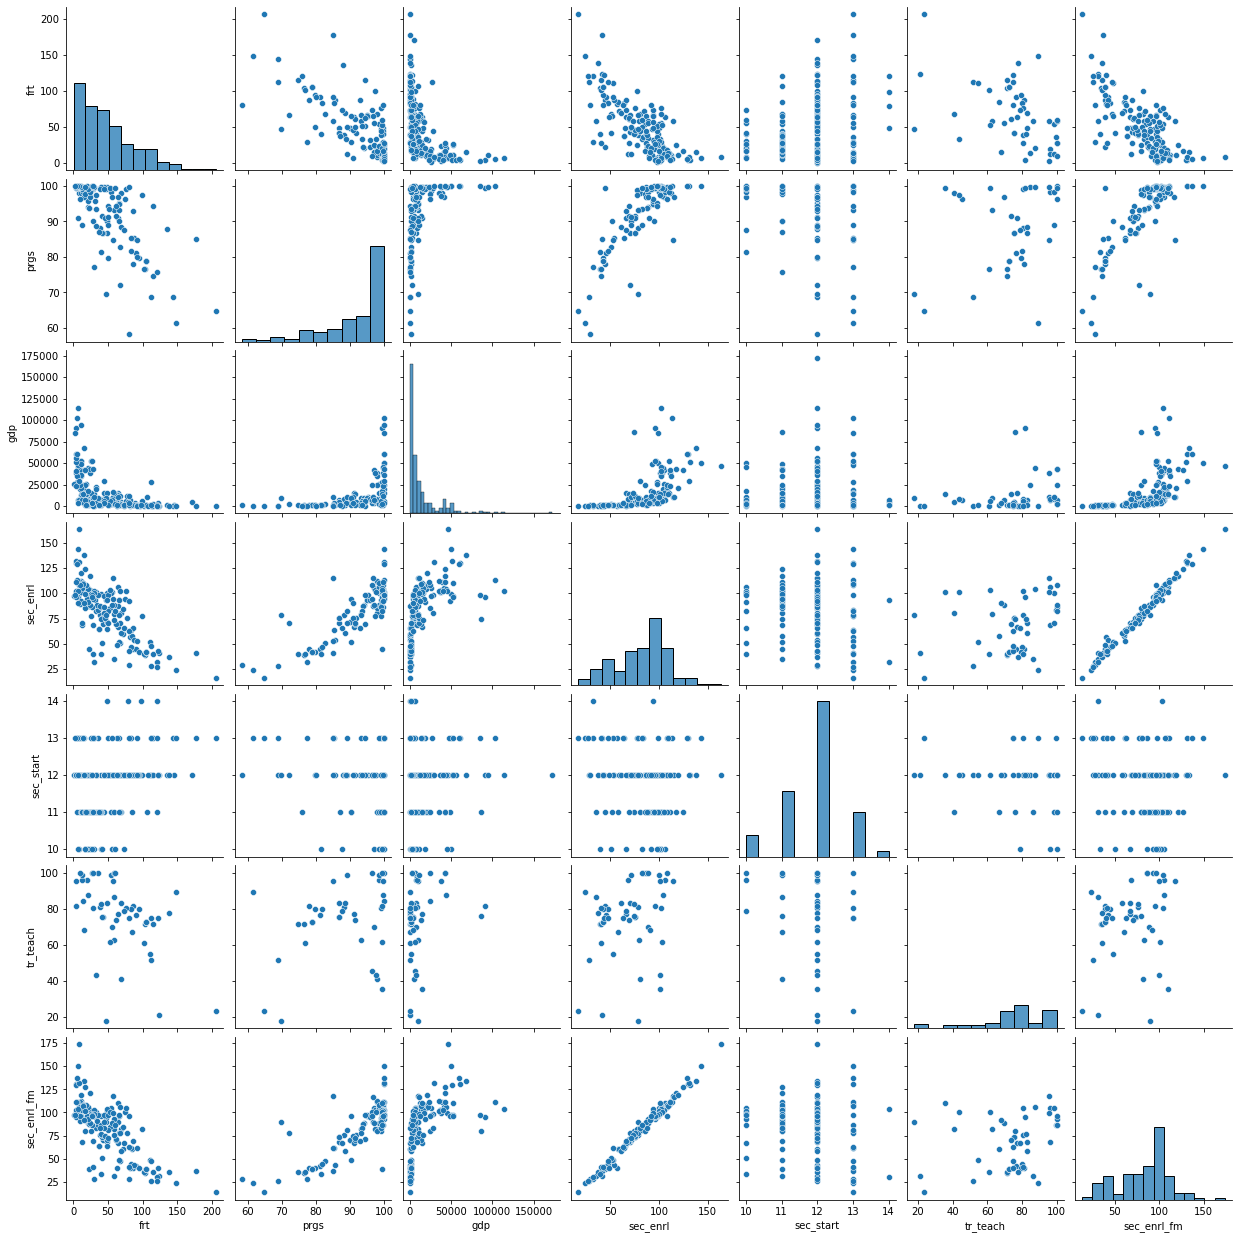

In [37]:
sns.pairplot(df_2013_melted)

*From the above plots, we observe that it is not rare that the variables we selected feature pair-wise correlation. The followings are reasons why:*
<br/> &emsp; 1. Expected multicollinearity: variables that are by nature correlated such as gross secondary education enrollment rate and that of only female students
<br/> &emsp; 2. Backed-up assumptions: we start with several assumptions based on which we choose the control variables. For example, we expect richer regions to allow higher secondary education enrollment, which is shown by the scatter plot in cell (4,3) above.

(I.1.1) Feature Engineering: GDP to log GDP
<br/>
*We want to stress the nature of the natural logarithmic distribution of GDP across the country, where there is an intensive clustering at a low level of GDP. And the subsequent effect can also be reflected in its correlation with other variables. We therefore will take a log-transformation on GDP, which will also influence the interpretation of our model later. (Natural log used here)*

In [38]:
df_2013_melted['log_gdp'] = np.log(df_2013_melted['gdp'])
df_2013_clean = df_2013_melted.drop(columns = ['gdp'])
#raw GDP record replaced with log-gdp

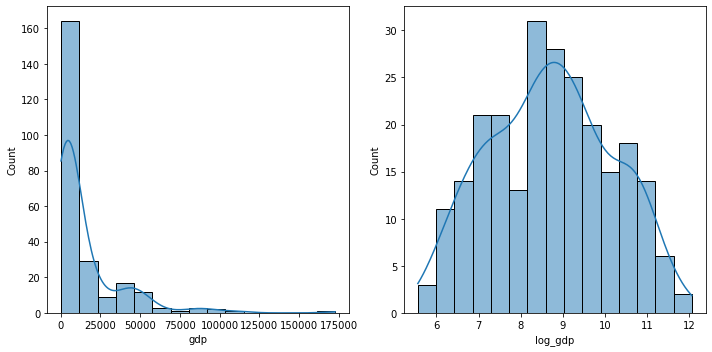

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(df_2013_melted['gdp'], ax=axes[0], bins = 15, kde= True)
sns.histplot(df_2013_clean['log_gdp'], ax=axes[1], bins = 15, kde= True)
fig.tight_layout()
fig.show()

*Plotting the distribution of the GDP and log GDP side by side, we could tell the effect of such transformation. The original distribution of GDP is highly right-skewed while the log-transformed GDP has an overall bell shape.*
<br/>
*The following is the pair plot after feature engineering, additional columns and rows at the end.*

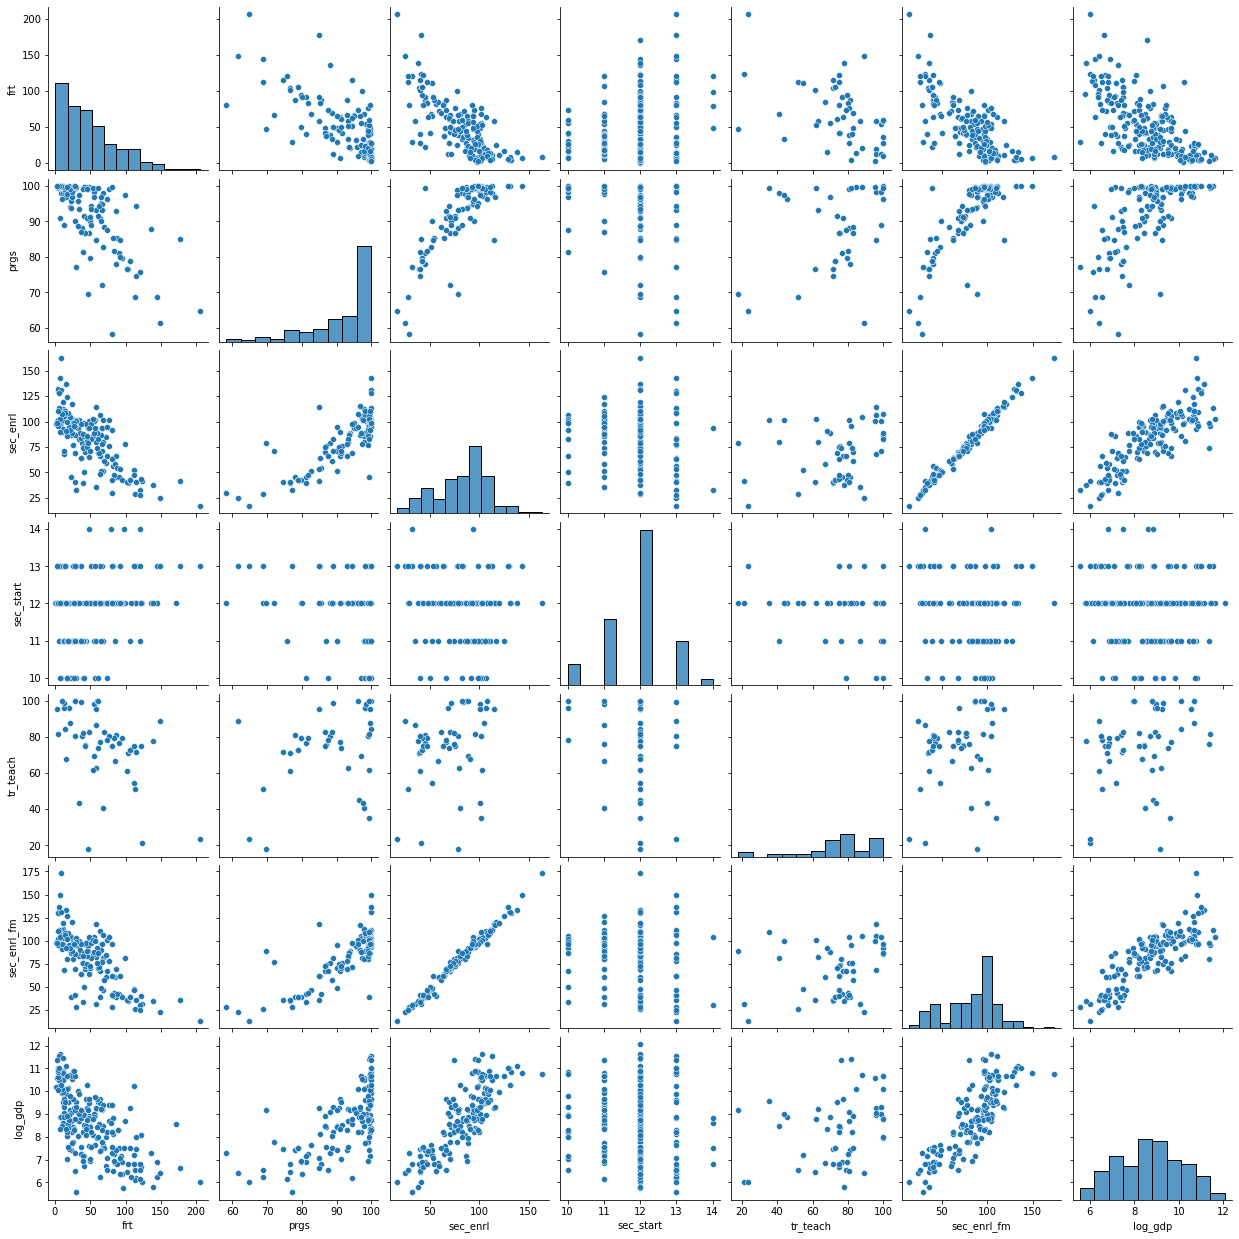

In [40]:
sns.pairplot(df_2013_clean)

*Now the correlation with log-transformed GDP with other variables, especially secondary school enrollment, is more notably linear.*

(I.1) Heatmap
*For a better-supported first-round screening, we use a heatmap of correlation coefficients to numerically represent the correlation for each variable pair. Check below:*

<AxesSubplot:>

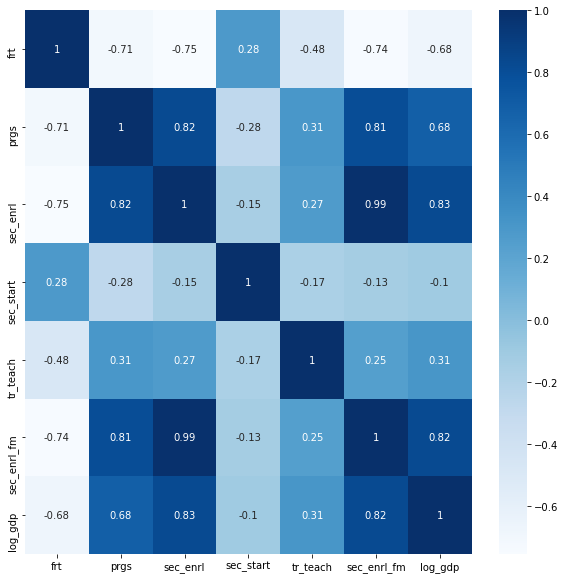

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df_2013_clean.drop(columns = ['Country Name', 'Country Code']).corr()
            , cbar = True, annot = True, cmap='Blues')

*The results are in line with our assumptions. We want to stress that at this preliminary stage, there is a relatively strong correlation between secondary school enrollment and log GDP (that be positive), secondary school enrollment and teenage fertility rate (that be negative).*

<b> (II) Missing and Abnormal data </b> 

(II.1) Summary Statistics
<br/>
the followings are the descriptive statistics of all variables

In [42]:
summary_2013 = df_2013_clean.describe()
summary_2013

,frt,prgs,sec_enrl,sec_start,tr_teach,sec_enrl_fm,log_gdp
count,240.000000,133.000000,178.000000,205.000000,58.000000,175.000000,242.000000
mean,49.315616,92.163247,83.021839,11.819512,75.173359,82.859363,8.700816
std,38.676686,9.332699,26.431101,0.846915,20.211903,28.214420,1.443488
min,0.599400,58.192509,16.807381,10.000000,17.878321,13.596250,5.558237
25%,17.602900,87.983589,66.094612,11.000000,70.094856,67.345364,7.512969
50%,40.981200,96.329437,88.365326,12.000000,77.484203,89.344879,8.724070
75%,71.896950,99.386528,101.187798,12.000000,87.387751,101.327084,9.661093
max,206.045000,99.990913,163.101013,14.000000,100.000000,173.737335,12.058518


(II.2) Missingness: Variable-wise check

In [43]:
null_notice = "[{col}] has [{pct}%] null entry"
for col in df_2013_clean.columns:
    pct_null = df_2013_clean[col].isnull().sum()/df_2013_clean.shape[0]
    pct_null *= 100
    
    print(null_notice.format(col = col, pct = pct_null.round(2)))

[Country Name] has [0.0%] null entry
[Country Code] has [0.0%] null entry
[frt] has [9.09%] null entry
[prgs] has [49.62%] null entry
[sec_enrl] has [32.58%] null entry
[sec_start] has [22.35%] null entry
[tr_teach] has [78.03%] null entry
[sec_enrl_fm] has [33.71%] null entry
[log_gdp] has [8.33%] null entry


*From the above result, we observe the systematic missing (about 78%) data in the record of tr_teach, which is the percentage of trained teachers in secondary education. Also, there are nearly 50% missing entries of prgs, progression to secondary education. We will refer back to the heatmap and pair plot to access the appropriateness of removal of these 2 features later. For now, our solution would be not to include prgs in computing our model.*

(II.3) Missingness: Observation-wise check

In this subsection, we are to explore missingness per observation: that is to answer the question of whether country that features more missing value differs from those with more complete data.

In [44]:
df_missing = df_2013_clean
df_missing['missing_f_count'] = df_2013_clean.isnull().sum(axis = 1)
df_missing.head()

,Country Name,Country Code,frt,prgs,sec_enrl,sec_start,tr_teach,sec_enrl_fm,log_gdp,missing_f_count
0,Arab World,ARB,48.796558,86.762436,70.274689,NaN,83.056610,67.672501,8.925148,1
1,Caribbean small states,CSS,58.363478,93.207108,79.585167,NaN,62.831612,82.432693,9.195526,1
2,Central Europe and the Baltics,CEB,20.062750,98.996262,103.608993,NaN,NaN,102.698448,9.525443,2
3,Early-demographic dividend,EAR,43.132990,NaN,69.978851,NaN,NaN,69.859428,8.107286,3
4,East Asia & Pacific,EAS,20.862558,93.983688,88.867348,NaN,NaN,88.965439,9.153546,2


<AxesSubplot:xlabel='missing_f_count', ylabel='Count'>

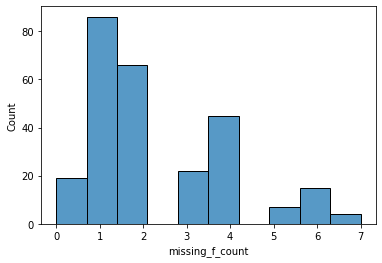

In [45]:
sns.histplot(df_missing['missing_f_count'])

By plotting the distribution of missingness, we see that most of the observations are missing less than 5 entries; we, therefore, set the threshold to be 5: then compare the countries with more than 5 entries missing to the rest of the data. Let's check which observations are those.

In [46]:
df_missing[df_missing['missing_f_count'] >= 5]

,Country Name,Country Code,frt,prgs,sec_enrl,sec_start,tr_teach,sec_enrl_fm,log_gdp,missing_f_count
33,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
50,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
56,Aruba,ABW,24.8420,NaN,NaN,12.0,NaN,NaN,NaN,5
83,Cayman Islands,CYM,NaN,NaN,NaN,11.0,NaN,NaN,NaN,6
86,Channel Islands,CHI,7.6044,NaN,NaN,NaN,NaN,NaN,NaN,6
111,Faroe Islands,FRO,NaN,NaN,NaN,NaN,NaN,NaN,10.898919,6
115,French Polynesia,PYF,37.3194,NaN,NaN,NaN,NaN,NaN,NaN,6
121,Gibraltar,GIB,NaN,NaN,NaN,11.0,NaN,NaN,NaN,6
123,Greenland,GRL,NaN,NaN,NaN,NaN,NaN,NaN,10.664943,6
125,Guam,GUM,49.4576,NaN,NaN,NaN,NaN,NaN,NaN,6


*We manually investigated those countries and found the following reason for possible missing entry: (given by index)*
<br/> &emsp; 1. Listing of none-country entity: 33, 50, 83, 86, 111, 187, 192, 247, 259
<br/> &emsp; 2. Complete missing record: 33, 50, 229
<br/> We will do clustered scatter plot to check the pattern. For countries with more than 5 missing entries, we mark them with a dummy variable missing_5 as 1, while 0 else wise.

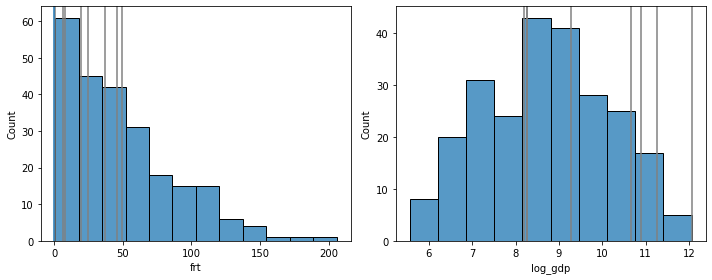

In [47]:
df_missing['missing_5'] = df_missing['missing_f_count'] >= 5

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(data = df_missing['frt'], ax=axes[0])
sns.histplot(data = df_missing['log_gdp'], ax=axes[1])

missing_frt = df_missing[df_missing['missing_f_count'] >= 5]['frt']
missing_log_gdp = df_missing[df_missing['missing_f_count'] >= 5]['log_gdp']

for f in missing_frt[missing_frt.notna()]:
    axes[0].axvline(f, color = 'grey')

for g in missing_log_gdp[missing_log_gdp.notna()]:
    axes[1].axvline(g, color = 'grey')
    
axes[0].axvline()
fig.tight_layout()
fig.show()


*We could observe that for missing_5 data, the countries tend to be those with lower teenage fertility rates, and those with higher GDP; this is a reminder in the following investigation that the missing data may exhibit some pattern such that the low-frt and high-GDP pairs are missing in our dataset.*

*For now, we will remove those observations from the dataset since they do not contain a record of frt, our outcome variable, and therefore should not be included in regression analysis.*

In [48]:
df_2013_clean = df_2013_clean[df_missing['missing_5']==False]
df_2013_clean.head()

,Country Name,Country Code,frt,prgs,sec_enrl,sec_start,tr_teach,sec_enrl_fm,log_gdp,missing_f_count,missing_5
0,Arab World,ARB,48.796558,86.762436,70.274689,NaN,83.056610,67.672501,8.925148,1,False
1,Caribbean small states,CSS,58.363478,93.207108,79.585167,NaN,62.831612,82.432693,9.195526,1,False
2,Central Europe and the Baltics,CEB,20.062750,98.996262,103.608993,NaN,NaN,102.698448,9.525443,2,False
3,Early-demographic dividend,EAR,43.132990,NaN,69.978851,NaN,NaN,69.859428,8.107286,3,False
4,East Asia & Pacific,EAS,20.862558,93.983688,88.867348,NaN,NaN,88.965439,9.153546,2,False


(II.4) Abnormal entry/Outlier Analysis
<br/> 
We will use Q1,3 +/- 1.5IQR formula to detect outliers, the following is an example of how we detect outliers in fertility rates. (Note that the lower bound is lower than 0 the theoretical lower bound, therefore only checked one side)

In [49]:
df_outlier = df_2013_clean
df_outlier['otlr'] = ""

/tmp/ipykernel_905/3942195595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier['otlr'] = ""


In [50]:
frt_iqr = summary_2013['frt']['75%'] - summary_2013['frt']['25%']
u_b = summary_2013['frt']['75%'] + 1.5*frt_iqr
l_b = summary_2013['frt']['25%'] - 1.5*frt_iqr
(l_b, u_b)
idx = df_2013_clean[df_2013_clean['frt'] > u_b].index

df_outlier.iloc[idx]

,Country Name,Country Code,frt,prgs,sec_enrl,sec_start,tr_teach,sec_enrl_fm,log_gdp,missing_f_count,missing_5,otlr
54,Argentina,ARG,63.9136,NaN,106.323143,12.0,NaN,110.274757,9.474795,2,False,
188,New Zealand,NZL,24.6234,NaN,117.223488,11.0,NaN,120.817070,10.667282,2,False,
211,Sao Tome and Principe,STP,86.8800,92.953369,65.914200,12.0,NaN,69.155952,7.415117,1,False,


In [51]:
otlr_dict = dict()
for col in summary_2013.columns:
    iqr = summary_2013[col]['75%'] - summary_2013[col]['25%']
    u_b = summary_2013[col]['75%'] + 1.5*iqr
    l_b = summary_2013[col]['25%'] - 1.5*iqr
    idx_u = df_outlier[df_outlier[col] > u_b].index
    idx_l = df_outlier[df_outlier[col] < l_b].index
    
    for u in idx_u:
        if u not in otlr_dict:
            otlr_dict[u] = []
            otlr_dict[u].append(('u_' + col))
        else:
            otlr_dict[u].append(('u_' + col))
    for l in idx_l:
        if l not in otlr_dict:
            otlr_dict[l] = []
            otlr_dict[l].append(('l_' + col))
        else:
            otlr_dict[l].append(('l_' + col))
         #df_outlier.at[u, 'otlr'] = df_outlier.iloc[u] + ',' + ('u_' + col)
    
    #df_outlier.at[idx_u, 'otlr'] = ('u_' + col)
    #df_outlier.at[idx_l, 'otlr'] = ('l_' + col)
otlr_dict

{52: ['u_frt'],
 169: ['u_frt'],
 190: ['u_frt', 'l_prgs', 'l_tr_teach', 'l_sec_enrl_fm'],
 77: ['l_prgs'],
 127: ['l_prgs'],
 172: ['l_prgs'],
 181: ['l_prgs'],
 232: ['l_prgs', 'l_tr_teach'],
 65: ['u_sec_enrl', 'u_sec_enrl_fm'],
 183: ['u_sec_start'],
 223: ['u_sec_start'],
 238: ['u_sec_start'],
 262: ['u_sec_start'],
 66: ['l_tr_teach'],
 91: ['l_tr_teach'],
 124: ['l_tr_teach'],
 227: ['l_tr_teach']}

In [52]:
for k,v in otlr_dict.items():
    out_status = '；'.join(v)
    df_outlier.at[k, 'otlr'] = out_status
df_outlier[df_outlier['otlr']!='']

,Country Name,Country Code,frt,prgs,sec_enrl,sec_start,tr_teach,sec_enrl_fm,log_gdp,missing_f_count,missing_5,otlr
52,Angola,AGO,171.2734,NaN,NaN,12.0,NaN,NaN,8.580571,4,False,u_frt
65,Belgium,BEL,8.6962,NaN,163.101013,12.0,NaN,173.737335,10.747382,2,False,u_sec_enrl；u_sec_enrl_fm
66,Belize,BLZ,68.2110,97.894997,80.163040,11.0,40.783409,81.800331,8.460325,0,False,l_tr_teach
77,Burkina Faso,BFA,112.6558,68.740540,28.365730,12.0,51.488350,25.964701,6.548699,0,False,l_prgs
91,"Congo, Dem. Rep.",ZAR,123.6202,NaN,40.993671,12.0,21.183241,31.359369,6.025131,1,False,l_tr_teach
124,Grenada,GRD,33.4268,97.510246,101.139801,12.0,43.487862,100.123360,8.981699,0,False,l_tr_teach
127,Guinea,GIN,143.7726,68.785683,NaN,13.0,NaN,NaN,6.256784,3,False,l_prgs
169,Mali,MLI,177.1464,85.062424,41.289589,13.0,NaN,36.595219,6.649308,1,False,u_frt
172,Mauritania,MRT,80.8598,58.192509,29.367229,12.0,NaN,28.405020,7.284709,1,False,l_prgs
181,Mozambique,MOZ,148.1392,61.482430,24.550350,13.0,89.090187,23.430410,6.405616,0,False,l_prgs


*The above table summarizes the outlier status of each feature, the shown observations are those that have at least feature being an outlier. Please check the table for the specific type of outliers.*
<br/>
*We could see the distribution of outliers features to a great extent no observable pattern; however, Niger (index 190) is of concern that it stands as a low outlier in progression to secondary education, percentage trained teacher in secondary education and female enrollment rate while being a high outlier in teenage fertility rate. This, though, is expected: our assumption states that secondary education in general (quality-wise and scale-wise) is negatively correlated with teenage fertility rate.*

<b> (III) Preliminary Regression Models </b> 
<br/>
*Now we are to carry out preliminary simple-linear regressions, the following two models (mod_1, mod_2) are single regressor models with frt regressed on log_gdp and sec_enrl respectively. Scatter plots with regression line as well as detailed regression results both displayed*

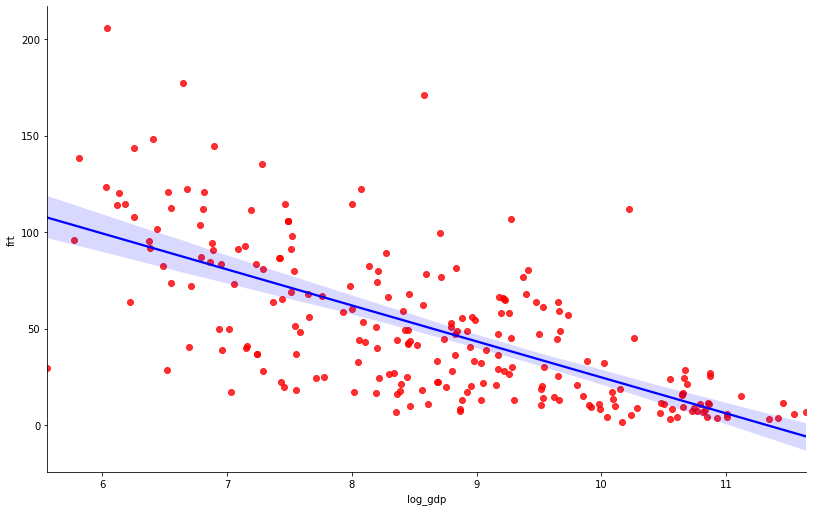

In [53]:
sns.lmplot(
    x='log_gdp', y='frt', data = df_2013_clean,
    fit_reg=True, 
    scatter_kws={'color':'red'}, 
    line_kws={'color':'blue'}, aspect = 1.6,
    height= 7)

In [54]:
dep_1, pred_1 = patsy.dmatrices('frt ~ log_gdp', df_2013_clean)
mod_1 = sm.OLS(dep_1, pred_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     192.8
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           3.79e-32
Time:                        23:33:14   Log-Likelihood:                -1093.8
No. Observations:                 229   AIC:                             2192.
Df Residuals:                     227   BIC:                             2198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    211.2344     11.747     17.982      0.0

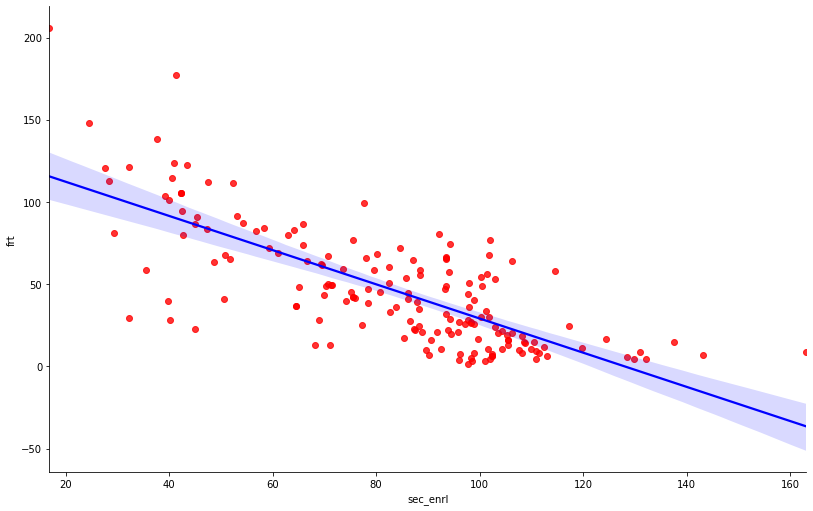

In [55]:
sns.lmplot(
    x='sec_enrl', y='frt', data = df_2013_clean,
    fit_reg=True, 
    scatter_kws={'color':'red'}, 
    line_kws={'color':'blue'}, aspect = 1.6,
    height= 7)

In [56]:
dep_2, pred_2 = patsy.dmatrices('frt ~ sec_enrl', df_2013_clean)
mod_2 = sm.OLS(dep_2, pred_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     226.5
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           3.32e-33
Time:                        23:33:14   Log-Likelihood:                -799.67
No. Observations:                 174   AIC:                             1603.
Df Residuals:                     172   BIC:                             1610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    133.0576      5.995     22.194      0.0

*We advance the preliminary correlation check to include the key features of our desired regression model, the independent variable of interest (which is sec_enrl) and the key control variable (log_gdp)*. Results are shown below:

In [57]:
dep_3, pred_3 = patsy.dmatrices('frt ~ sec_enrl + log_gdp', df_2013_clean)
mod_3 = sm.OLS(dep_3, pred_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     130.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           7.80e-35
Time:                        23:33:14   Log-Likelihood:                -779.16
No. Observations:                 171   AIC:                             1564.
Df Residuals:                     168   BIC:                             1574.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    175.6131     13.341     13.163      0.0

<b>*A Final EDA Note:*</b> <br/>
At this stage, we are almost confident that all models above (mod_1, mod_2, mod_3) are theoretically wrong in that they bear very large omitted variable bias. The reason why we still carry out those analyses is to: first, display the details not uncovered in the correlation heap map during screening, and second get a sense of whether we are heading in the right direction (if those models were incredibly bad to begin with, then improving the model will also be not-so-likely rewarding)
<br/>
<br/>
<b>*The Next steps:*</b> 
<br/>
Moving forward, we are looking for ways to eliminate OVB as much as possible in which we hope to let other variables pick up the effect on secondary education enrollment rate and teenage fertility rate (reduce confounding). For now, our proposal is to, on top of the means of control we have for now, adapt an entity-fixed effect where neighboring countries are grouped in one entity to pick up the 'cultural influence'. Our assumption here would be that different regions (i.e countries) have a different social attitude towards teenage fertility (both the teenagers and their parents could vary in their ideology concerning having kids early; or in some societies, it is generally accepted or even expected that one to give birth during their late teenage.)

# Data Analysis & Results

<b> (I) Methodology: Regression Analysis </b> 
<br/>
As mentioned in our exploratory analysis and data wrangling part, we will be using a regression model to determine the effect of secondary education enrollment rate on teenage fertility rate, net of other confounding factors. Our first step is to identify the confounding factors. We look for factors that are correlated with teenage fertility rate and potentially also associated with secondary education enrollment rate.


<br/>
We bisect the confounders into two groups: economic and cultural factors. We argue that the economic factors influence fertility decisions (including that of teenage fertility rate): we assume that, in simple words, poorer countries tend to feature lower secondary education enrollment rates and higher teenage fertility rates. Our claim is that indication of lower economic development is positively correlated with teenage fertility rate since there is a higher demand of labor to incentivize earlier birth-giving since it is a rewarding economic choice. It is not hard to locate these related economic factors since they tend to be quantitatively documented widely on a country level and we can directly access them in our data set published by the World Bank. (check the variable table in the data cleaning part for details). However, the case of cultural factors is much more complex.
<br/>

<br/>
First, we want to state that we include cultural factors as a comprehensive proxy of the aggregation of attitudes/thinking-driven consideration of teenage fertility: in some cultures, having kids before a girl reaching twenty or even eighteen may be commonly accepted and practiced while this is not the case in other regions. The difficulty lies in the fact that such cultural differences are not and, to a great extent, impossible to be quantitatively measured: we do not have a record of them in our data set, and possibly not in any data set in the world. However, we attempt to deal with this problem with clustering. Our assumption is that countries all around the world fall into a much smaller number (than the number of countries) of clusters: within each cluster, the countries share a similar ideology and therefore people hold closely-matching ideas of teenage fertility. incorporating such assumption into the model, we now have our final model, multiple linear regression with entity fixed effect.

(I.1) Theoretical Model: Multiple Regression with Entity-Fixed Effect

<br/>
As seen in the EDA part and our discussion on selecting our control variables above, the economic control variables are real GDP (log-transformed), and the age of entering secondary education. The cultural factors are to be controlled by introducing an entity fixed effect, assuming the clustering in social attitude towards teenage fertility. Our theoretical model is then the following:
<br/>
<br>
<div style="text-align: center"> 
$Teen\_Fert = \beta_0 + \beta_1 sec\_educ\_enrll + \beta_2 sec\_educ\_start + \beta_3 log(R\_GDP) + \lambda_i + \epsilon$
</div>
<br/>
Our coefficient of interest is $\beta_1$ which captures the theoretical effect of the secondary education enrollment rate on teenage fertility rate net of other factors. We will test for its significance and examine its effect size.
<br/>
<br/>
$\lambda_i$ refers to the entity fixed effect of different culturally clustered regions, i being the index of the entity. As of a fixed-effect model, the difference in the effect of culture is featured by a constant for each entity. 
<br/>

(I.2) Base-line model: Multiple regression without entity fixed effect
<br/>
We start by looking at a simplified model without introducing a fixed effect. We denote this as model 1, mathematically:
<br>
<br/>
<div style="text-align: center"> 
$Teen\_Fert = \beta_0 + \beta_1 sec\_educ\_enrll + \beta_2 sec\_educ\_start + \beta_3 log(R\_GDP) + \epsilon$
</div>
<br/>

In [58]:
dep_4, pred_4 = patsy.dmatrices('frt ~ sec_enrl + log_gdp + sec_start', df_2013_clean)
mod_4 = sm.OLS(dep_4, pred_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     62.48
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           1.80e-24
Time:                        23:33:14   Log-Likelihood:                -576.64
No. Observations:                 125   AIC:                             1161.
Df Residuals:                     121   BIC:                             1173.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    101.1576     34.099      2.967      0.0

(I.3) Full model: Introducing Entity-Fixed effect:
<br/>
We cite Northouse, 2007, p.308 for their definition of cultural clusters around world. They classify the countries into the following 10 categories, shown below with their summarized characteristics:
<br/>
__Anglo__ - competitive and result-oriented
<br/>
__Confucian Asia__ - result-driven, encourage group working together over individual goals
<br/>
__Eastern Europe__ - forceful, supportive of co-workers, treat women with equality
<br/>
__Germanic Europe__ - value competition & aggressiveness and are more result-oriented
<br/>
__Latin America__ - loyal & devoted to their families and similar groups
<br/>
__Latin Europe__ - value individual autonomy
<br/>
__Middle East__ - devoted & loyal to their own people, women afforded less status
<br/>
__Nordic Europe__ - high priority on long-term success, women treated with greater equality
<br/>
__Southern Asia__ - strong family & deep concern for their communities
<br/>
__Sub-Sahara Africa__ - concerned & sensitive to others, demonstrate strong family loyalty 
<br/>
(Northouse, 2007, p.309-313).
<br/>
__*South East Aisa*__ - this is another commonly recognized cultural cluster not specified by Northouse, including Thailand, Lao's, Malaysia, and Vietnam
<br/>
The clusters are coded mannually, we load them here from our file.

In [59]:
cluster_code = pd.read_csv('df_2013_coded.csv')

cluster_code = cluster_code[['Country Code', 'Entity']]
cluster_code[70:77]

,Country Code,Entity
70,BRA,LA
71,VGB,NaN
72,BRN,NaN
73,BGR,EE
74,BFA,SSA
75,BDI,SSA
76,CPV,SSA


The above demo cells are how we coded the cluster with the new column 'Entity' filled in with the initials of each cluster defined above. __Note:__ the cultural clustering does not result in a perfect partition of the countries, since either some countries are not categorized to be in any group, or they simplly posses culture significantly different from others, and this is exactly the reason why NaN is observed above. We will keep such missingness in the entity lable in mind and deal with them later. Now we will merge the entity lable into our data sets.

In [60]:
df_2013_cluster = df_2013_clean.merge(cluster_code, left_on = 'Country Code', right_on = 'Country Code')
df_2013_cluster


,Country Name,Country Code,frt,prgs,sec_enrl,sec_start,tr_teach,sec_enrl_fm,log_gdp,missing_f_count,missing_5,otlr,Entity
0,Arab World,ARB,48.796558,86.762436,70.274689,NaN,83.056610,67.672501,8.925148,1,False,,NaN
1,Caribbean small states,CSS,58.363478,93.207108,79.585167,NaN,62.831612,82.432693,9.195526,1,False,,NaN
2,Central Europe and the Baltics,CEB,20.062750,98.996262,103.608993,NaN,NaN,102.698448,9.525443,2,False,,NaN
3,Early-demographic dividend,EAR,43.132990,NaN,69.978851,NaN,NaN,69.859428,8.107286,3,False,,NaN
4,East Asia & Pacific,EAS,20.862558,93.983688,88.867348,NaN,NaN,88.965439,9.153546,2,False,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Vietnam,VNM,37.090200,87.109177,NaN,11.0,NaN,NaN,7.553583,3,False,,SEA
234,West Bank and Gaza,WBG,60.181600,99.448181,82.538620,10.0,100.000000,86.394127,8.003765,0,False,,ME
235,"Yemen, Rep.",YEM,63.731800,NaN,48.624660,12.0,NaN,39.502151,7.366982,2,False,,ME
236,Zambia,ZMB,98.173800,NaN,NaN,14.0,NaN,NaN,7.517259,4,False,u_sec_start,SSA


(I.2) Including the Entity-fixed Effect
<br/>
We now have the necessary labeling of the clusters to run entity-fixed effect regression to construct our full model:
<br>
<div style="text-align: center"> 
$Teen\_Fert = \beta_0 + \beta_1 sec\_educ\_enrll + \beta_2 sec\_educ\_start + \beta_3 log(R\_GDP) + \lambda_i + \epsilon$
</div>

In [61]:
dep_5, pred_5 = patsy.dmatrices('frt ~ sec_enrl + log_gdp + sec_start + Entity', df_2013_cluster)
mod_5 = sm.OLS(dep_5, pred_5)
res_5 = mod_5.fit()
print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     18.56
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           5.28e-19
Time:                        23:33:15   Log-Likelihood:                -418.99
No. Observations:                  94   AIC:                             866.0
Df Residuals:                      80   BIC:                             901.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       204.2506     50.815      4.019

<b> (II) Result Interpretation </b>
<br>
Overtime, we have being developing our regression model by adding new regressors and finally including entity fixed effect. Our established models are the followings:

<br/>
<div style="text-align: left"> 
Model (1): &emsp; $Teen\_Fert = \beta_0 + \beta_2 log(R\_GDP) + \epsilon$
</div>
<br/>

<br/>
<div style="text-align: left"> 
Model (2): &emsp; $Teen\_Fert = \beta_0 + \beta_1 sec\_educ\_enrll + \beta_2 log(R\_GDP) + \lambda_i + \epsilon$
</div>
<br/>

<br/>
<div style="text-align: left"> 
Model (3): &emsp; $Teen\_Fert = \beta_0 + \beta_1 sec\_educ\_enrll + \beta_2 sec\_educ\_start + \beta_3 log(R\_GDP) + \epsilon$
</div>
<br/>

<br/>
<div style="text-align: left"> 
Model (4): &emsp; $Teen\_Fert = \beta_0 + \beta_1 sec\_educ\_enrll + \beta_2 sec\_educ\_start + \beta_3 log(R\_GDP) + \lambda_i + \epsilon$
</div>
<br/>

They are of course for different purposes: model 1 and model 2 are constructed for the very first round of variable screening. Model 3 introduces all the quanitative varaibels we identified as necessary and related control variables. In Model 4 we establish our final model to include entity fixed effect, attempting to negate the difference between cultures.

__(II. 1) Discussion on Effect Size $\beta_1$__
<br>
<br>
Though the models are different and vary in functionality, we could still make observation among them since, from model 1 to model 4, we gradually add in new predictors into the model upon each update; and it is curcial to note that for a regression model, the predictive power of the model is a non-decreasing function of the regressors. (i.e. the model is never penalized for being equipped with more regressors of little relevance.

Check out the summarized model results here:

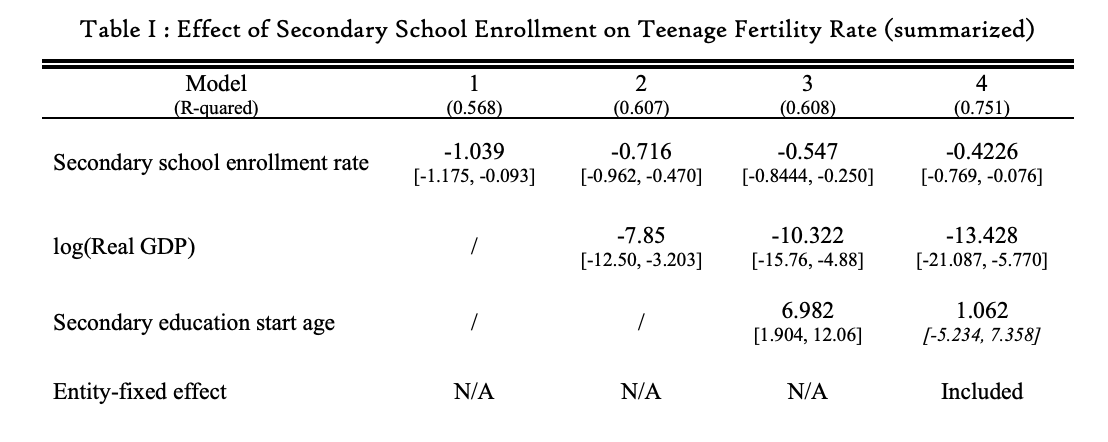

In [62]:
Image("model_summary.png")

__Results from Model 4, Multiple Regression with Entity-fixed Effect__
<br>
<br/>
We state first our finding of the effect of secondary school enrollment: according to our full model (model 4), we find that 1% increase in the gross secondary school enrollment rate is correlated with a -0.42 decrease in teenage fertility per 1000 female from twelve to eighteen while holding real GDP, secondary education start age, and assignation to cultural clusters constant. Simply put, we would expect to see one less teenage mother per 1000 girls upon a 2.5% increase in the gross secondary school enrollment rate. And The effect is statistically significant at 95% level: we are 95% confident that the effect lies between -0.769 and -0.076.

<br/>
Looking at the coefficients of the control variables, we find out that there is a statistically significant effect (at 95% confidence level) of real GDP on teenage fertility rate. Specifically, our model suggests that each percent increase in real GDP is associated with a -0.13 drop in the number of teenage mothers out of 1000 girls. Meanwhile, we do not have enough evidence to show there is a correlation between the start age of secondary school education and the teenage fertility rate.

__Effect Size progressing from Model 1 to 4__
<br/>
<br/>
One can notice the clear drop in the estimated effect size (i.e. the absolute value of the coefficient $\beta_1$ shown in the first row of Table I) from model 1 to model 4. Such a decreasing trend demonstrates the process of how we eliminate omitted variable bias; that is to exclude the effect of other variables that have been incorrectly picked up by secondary school enrollment rate. Given the results of our EDA and the first row of Table I, it is not hard to uncover the positive correlation of secondary school enrollment rate with both real GDP and secondary education start age. When the entity-fixed effect is included, we see cultural factors further absorb part of the effect of secondary school enrollment rate.

__(II. 1) Discussion on Model Performance: a look into predictive power__
<br>
<br>
Model 4, being the most comprehensive one in this report, achieves a R-squared of roughly 75%. The predictive power is pretty impressive: about 75% of the variation in teenage fertility rate is captured by our model 4 by knowing secondary school education, real GDP, secondary education start age and the belonging of cultural cluster.

<br>
We are, however, more interested in the predictive power of secondary school enrollment rate alone. We seek ways to isolate its own predictive power in teenage fertility rate. We will check its marginal preditive power, in this context, the increase in R-squared before and after including secondary school enrollment rate.
<br>
<br>
We will have to look at a few more regression models for comparison purpose.

In [63]:
print(res_5.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     18.56
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           5.28e-19
Time:                        23:33:15   Log-Likelihood:                -418.99
No. Observations:                  94   AIC:                             866.0
Df Residuals:                      80   BIC:                             901.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         


In [64]:
dep_5_n, pred_5_n = patsy.dmatrices('frt ~ log_gdp + sec_start + Entity', df_2013_cluster)
mod_5_n = sm.OLS(dep_5_n, pred_5_n)
res_5_n = mod_5_n.fit()
print(res_5_n.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     21.46
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           7.57e-24
Time:                        23:33:15   Log-Likelihood:                -582.29
No. Observations:                 126   AIC:                             1191.
Df Residuals:                     113   BIC:                             1227.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         


In [65]:
dep_4_n, pred_4_n = patsy.dmatrices('frt ~ log_gdp + sec_start', df_2013_clean)
mod_4_n = sm.OLS(dep_4_n, pred_4_n)
res_4_n = mod_4_n.fit()
print(res_4_n.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     89.58
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           9.97e-28
Time:                        23:33:15   Log-Likelihood:                -876.29
No. Observations:                 183   AIC:                             1759.
Df Residuals:                     180   BIC:                             1768.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         


In [66]:
print(res_4.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     62.48
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           1.80e-24
Time:                        23:33:15   Log-Likelihood:                -576.64
No. Observations:                 125   AIC:                             1161.
Df Residuals:                     121   BIC:                             1173.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         


In [67]:
print(res_3.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     130.0
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           7.80e-35
Time:                        23:33:15   Log-Likelihood:                -779.16
No. Observations:                 171   AIC:                             1564.
Df Residuals:                     168   BIC:                             1574.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         


In [68]:
dep_3_n, pred_3_n = patsy.dmatrices('frt ~ log_gdp', df_2013_clean)
mod_3_n = sm.OLS(dep_3_n, pred_3_n)
res_3_n = mod_3_n.fit()
print(res_3_n.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                    frt   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     192.8
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           3.79e-32
Time:                        23:33:15   Log-Likelihood:                -1093.8
No. Observations:                 229   AIC:                             2192.
Df Residuals:                     227   BIC:                             2198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         


Looking at the tables aboves, we could observe the following results regarding the marginal predictive power of secondary school enrollment rate (increase in R-squared when only adding teenage fertility rate as a regressor).
<br>
~15%:&emsp;holding GDP in the model, the marginal increase of R^2 when including secondary school enrollment rate.
<br>
~10%&emsp; holding GDP and secondary school start age constant in the model.
<br>
~5%: &emsp;    holding GDP, secondary school start age, and cluster labelings in constant in the model.

# Ethics & Privacy

__(I) Ethic concerns__
<br>
We obtained our data sets from the open publication of World Bank, which has allowed access of the data for analysis purposes by third parties. Regarding data privacy, the World Bank has done most of the work during their pre-publishing stage: the accessible data set itself is only an aggregation of individual data and the most specific unit of observation is a district; therefore no individual information is revealed to any extent in our data set.

__(II) Potential bias issue and handling__
<br>
We acknowledge the potential bias arising from our data cleaning stage. For some countries, the world bank has little record of their economic status and related indicators. In our case, we have to exclude the observations with key variables missing (including teenage fertility rate, GDP record, and secondary education enrollment rate). We have attempted to handle such an issue by not including any arbitrary operation that influences inclusion in and exclusion from any observation during analysis. We examine the observations to find little convincing pattern in the missingness of data: it is not the case that countries with higher or lower values in one indicator are more likely to have missing entries in other indicators (consult EDA for details).
<br>
<br>
There could still be limitations though: for countries with missing entries in most or all of the indicators we require in the analysis, their pattern can not be determined. Therefore, the results of our analysis may be less credible since the sample is not representative with respect to those countries (despite there are not many of them).

# Conclusion & Discussion

__(I) Conclusion of findings__
<br>
We attempt to investigate the relationship between secondary school enrollment rate and teenage fertility rate with the assumption that with higher coverage of secondary education, a lower teenage fertility rate is expected. We try to estimate the relationship by figuring out the correlation between these two variables and have done so by constructing a linear-log multiple regression model with entity-fixed effect controlled. We controlled for log-transformed GDP and secondary education start age as economic confounding factors. We seek to exclude the country-level variability in the attitude towards teenage fertility. To achieve that, we introduce the entity-fixed effect where each entity is a cluster of countries that have closely related cultures (the clustering labels are cited from Northouse, 2007). We assume members in the same cluster hold consistent views regarding teenage fertility. Our final model is as the following:
<br>
<br>
<div style="text-align: center"> 
$Teen\_Fert = \beta_0 + \beta_1 sec\_educ\_enrll + \beta_2 sec\_educ\_start + \beta_3 log(R\_GDP) + \lambda_i + \epsilon$
</div>
<br>
<br>
By constructing a multiple linear regression model with fixed effect, we find out that a 1% increase in the gross secondary school enrollment rate is correlated with a -0.42 decrease in teenage fertility per 1000 females from twelve to eighteen while holding real GDP, secondary education start age, and assignation to cultural clusters constant. The effect is tested to be significant at a 95% confidence level.
<br>
<br>
In terms of predictive power, our model achieves an R-squared value of 75%, it could explain three fourth of the variation in teenage fertility rate given information on real GDP, secondary school enrollment rate, secondary school start age, and the cultural cluster of the country.


__(II) Discussion on Validity and Potential Improvements__
<br>
We acknowledge the potential problems of our model construction, which arise from both regressor selection and the application of the entity-fixed effect.

Regarding variable selection, there could be a better choice of control variables to represent other aspects of confounding. For example, it would be ideal to explicitly control the quality of education and the health system in the country. Desired variables for those two are respectively, for instance, the percentage of qualified teachers in secondary school education and the national expenditure on teenage health care. This is limited by the availability of data: the former variable is recorded with huge missingness and the latter is not recorded. We could seek to improve this by looking for additional data sources to fill in the blank. Instead of the collective records (like one we used for this analysis), collecting nationwide data sets extracting only the necessary information could be one solution.

The validity of our clustering fixed effect approach is, admittedly, highly dependent on how much the real world satisfies our assumption. The result would be less convincing if: (1) people from different nations within the same cluster have very different views regarding teenage fertility (2) the labeling is itself wrong that it includes nations of different cultural backgrounds into the same cluster. We recognize the difficulty in producing such labeling. Northouse based their assignation on ancestry composition and geographical proximities; therefore (2) mentioned above is less of our concern. However, we want to stress the possibility of (1) that is rooted in the nature of our observations. Each of our observations is a record of a country, and we could not exclude the possibility of a country featuring a fairly equal partition of cultural backgrounds. For example, both Latin European and Germanic European backgrounds are non-trivially present in France in the west and east of the country. A feasible remedy to such a problem may be to introduce weight on the diverse cultural composition and determine the dominating one. Also, as mentioned in the data analysis part, the labeling we adapt for now is not exhaustive itself. Only approximately half of the countries are assigned to cultural clusters, which reduces our sample size.

# Team Contributions
Jiawei Yang: EDA, Data Analysis and results, Video<br>
Yating Yang: Overview and data wrangling<br>
Xinran Shen: Data cleaning and visualization<br>
Yue Wang: Background and Prior work, Dataset research<br>
Xiaolong Zhou: Hypothesis and research question, Ethics
